In [1]:
import numpy as np
import scipy.stats as ss
from scipy.stats import linregress
import matplotlib.pyplot as plt


In [2]:
T = np.array([1, 10, 50, 100, 1000, 10000])
Hm0_SE = np.array([1.8, 2.2, 2.8, 3.0, 3.8, 4.5])

Hm0_WW = np.array([2.5, 3.3, 3.8, 4.0, 4.7, 5.3])

In [3]:
# W_SE = ss.weibull_min(Hm0_SE, T)

[0.     0.9    0.98   0.99   0.999  0.9999]
Estimated Weibull parameters:
Shape (k) = 1.9204
Scale (λ) = 1.3919


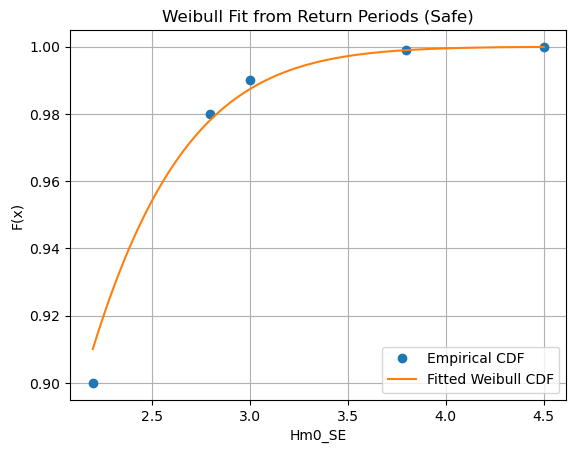

In [7]:
#Exceedance probability
F = 1 - 1 / T
print(F)

# Remove values where F is 0 or 1 to avoid log(0)
valid = (F > 0) & (F < 1)
F = F[valid]
x = Hm0_SE[valid]

# Linearize Weibull CDF
Y = np.log(-np.log(1 - F))
X = np.log(x)

# Linear regression
slope, intercept, r_value, _, _ = linregress(X, Y)
k = slope
lambda_ = np.exp(-intercept / k)

print(f"Estimated Weibull parameters:\nShape (k) = {k:.4f}\nScale (λ) = {lambda_:.4f}")

# Plotting
x_fit = np.linspace(min(x), max(x), 100)
F_fit = 1 - np.exp(-(x_fit / lambda_) ** k)

plt.plot(x, F, 'o', label="Empirical CDF")
plt.plot(x_fit, F_fit, '-', label="Fitted Weibull CDF")
plt.xlabel('Hm0_SE')
plt.ylabel('F(x)')
plt.grid(True)
plt.legend()
plt.title("Weibull Fit from Return Periods (Safe)")
plt.show()

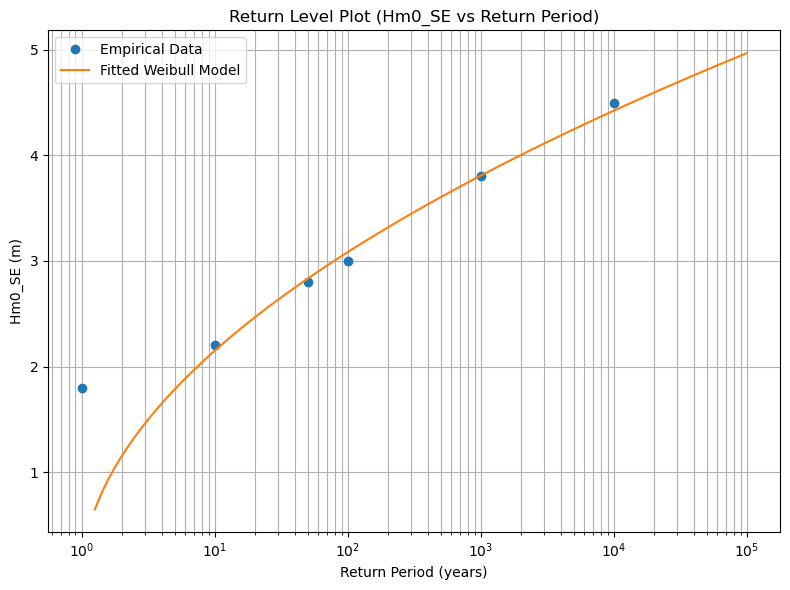

In [8]:
T_fitted = np.logspace(0.1, 5, 100)  # e.g., from ~1.25 to 100,000 years
F_fitted = 1 - 1 / T_fitted

# Invert the Weibull CDF to get Hm0_SE values:
Hm0_SE_fitted = lambda_ * (-np.log(1 - F_fitted))**(1 / k)

# Plot
plt.figure(figsize=(8,6))
plt.plot(T, Hm0_SE, 'o', label="Empirical Data")
plt.plot(T_fitted, Hm0_SE_fitted, '-', label="Fitted Weibull Model")
plt.xscale('log')
plt.xlabel("Return Period (years)")
plt.ylabel("Hm0_SE (m)")
plt.title("Return Level Plot (Hm0_SE vs Return Period)")
plt.grid(True, which="both")
plt.legend()
plt.tight_layout()
plt.show()

In [6]:
T_target = 450
F = 1 - 1 / T_target
Hm0_SE_450 = lambda_ * (-np.log(1 - F))**(1 / k)

print(f"Hm0_SE for T = {T_target} years: {Hm0_SE_450:.3f} meters")

Hm0_SE for T = 450 years: 3.533 meters
